In [8]:
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind as ttest

In [19]:
promoters = open("promoters.bed")
E4 = open("E4.0_scores.txt")
E55 = open("E5.5_scores.txt")

E4_scores = {}
E55_scores = {}
E4_hox_scores = {}
E55_hox_scores = {}

for line in promoters:
    fields = line.split()
    promoter = fields[3]
    
    if "Hox" in promoter:
        E4_hox_scores[promoter] = 0.0
        E55_hox_scores[promoter] = 0.0
    else:
        E4_scores[promoter] = 0.0
        E55_scores[promoter] = 0.0

In [20]:
for line in E4:
    fields = line.split()
    promoter = fields[0]
    meth_score = float(fields[1])
    
    if "Hox" in promoter:
        E4_hox_scores[promoter] = meth_score
    else:
        E4_scores[promoter] = meth_score

for line in E55:
    fields = line.split()
    promoter = fields[0]
    meth_score = float(fields[1])
    
    if "Hox" in promoter:
        E55_hox_scores[promoter] = meth_score
    else:
        E55_scores[promoter] = meth_score

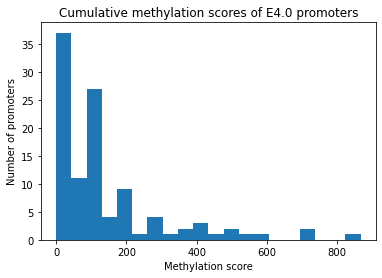

In [21]:
E4_hist = list(E4_scores.values()) + list(E4_hox_scores.values())

fig, ax = plt.subplots()
ax.hist(E4_hist, bins = 20)

ax.set_ylabel("Number of promoters")
ax.set_xlabel("Methylation score")
ax.set_title("Cumulative methylation scores of E4.0 promoters")

plt.show()

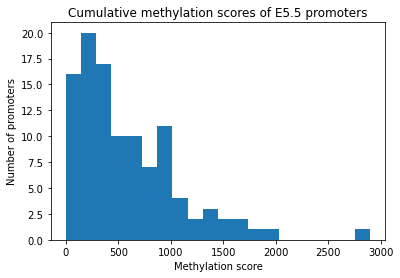

In [22]:
E55_hist = list(E55_scores.values()) + list(E55_hox_scores.values())

fig, ax = plt.subplots()
ax.hist(E55_hist, bins = 20)

ax.set_ylabel("Number of promoters")
ax.set_xlabel("Methylation score")
ax.set_title("Cumulative methylation scores of E5.5 promoters")

plt.show()

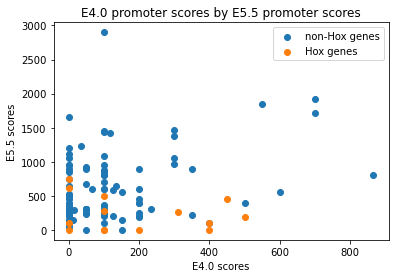

In [23]:
fig, ax = plt.subplots()
ax.scatter(E4_scores.values(), E55_scores.values(), label = "non-Hox genes")
ax.scatter(E4_hox_scores.values(), E55_hox_scores.values(), label = "Hox genes")

ax.set_ylabel("E5.5 scores")
ax.set_xlabel("E4.0 scores")
ax.set_title("E4.0 promoter scores by E5.5 promoter scores")
ax.legend()

plt.show()

In [27]:
ttest(list(E4_hox_scores.values()), list(E4_scores.values()), alternative = "less")

Ttest_indResult(statistic=1.312084775305018, pvalue=0.9038236098447255)

Not significantly lower methylation

In [29]:
ttest(list(E55_hox_scores.values()), list(E55_scores.values()), alternative = "less")

Ttest_indResult(statistic=-2.8618380769825458, pvalue=0.0025422107749789647)

Significantly lower methylation